## Tag Analysis of Tumblir Posts (LOT and John Constantine)

In [69]:
import os
import json
import pandas
from collections import Counter
import networkx
import matplotlib.pyplot as plt

In [70]:
folder = "Tumblr-JohnConstantine-2019-04-17"

In [71]:
tag = "legends of tomorrow"
threshold = 50

In [72]:
all_files = os.listdir(folder)

In [73]:
all_tags_count = []
all_tags = dict()

In [74]:
for filename in all_files:
    with open(os.path.join(folder, filename), "r") as f:
        data = f.readlines()
    data = " ".join(data)
    data = json.loads(data)
    if tag:
        if tag not in data["tags"]:
            continue
    for tag1 in data["tags"]:
        for tag2 in data["tags"]:
            tag1 = tag1.lower()
            tag2 = tag2.lower()
            all_tags_count.append(tag1)
            all_tags_count.append(tag2)
            if tag1 != tag2:
                if tag1 > tag2:
                    if tag1 not in all_tags:
                        all_tags[tag1] = dict()
                    if tag2 not in all_tags[tag1]:
                        all_tags[tag1][tag2] = 0
                    all_tags[tag1][tag2] += 1

In [75]:
all_tags_count = Counter(all_tags_count)

In [76]:
all_tags_count_pandas = pandas.DataFrame.from_dict(all_tags_count, orient="index", columns=["Count"])
all_tags_count_pandas.sort_values("Count", ascending=False, inplace=True)

In [77]:
all_tags_count_pandas.head(20)

,Count
legends of tomorrow,29668
john constantine,29668
sara lance,8772
matt ryan,7770
constantine,6758
ray palmer,5210
lot,4384
mick rory,4376
gary green,4246
zari tomaz,3756


In [78]:
all_tags_list = []
for tag1, data in all_tags.items():
    for tag2, count in data.items():
        all_tags_list.append([tag1, tag2, count])

In [79]:
all_tags_pandas = pandas.DataFrame(all_tags_list, columns=["Tag1", "Tag2", "Count"])
all_tags_pandas.sort_values("Count", ascending=False, inplace=True)

In [80]:
all_tags_pandas.head()

,Tag1,Tag2,Count
0,legends of tomorrow,john constantine,2183
5056,sara lance,john constantine,510
5057,sara lance,legends of tomorrow,510
4532,matt ryan,john constantine,425
4533,matt ryan,legends of tomorrow,425


In [81]:
S = networkx.Graph()
S.add_edges_from([tuple([t1, t2, {"weight": count}]) for t1, t2, count in all_tags_list if count > threshold])

/usr/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


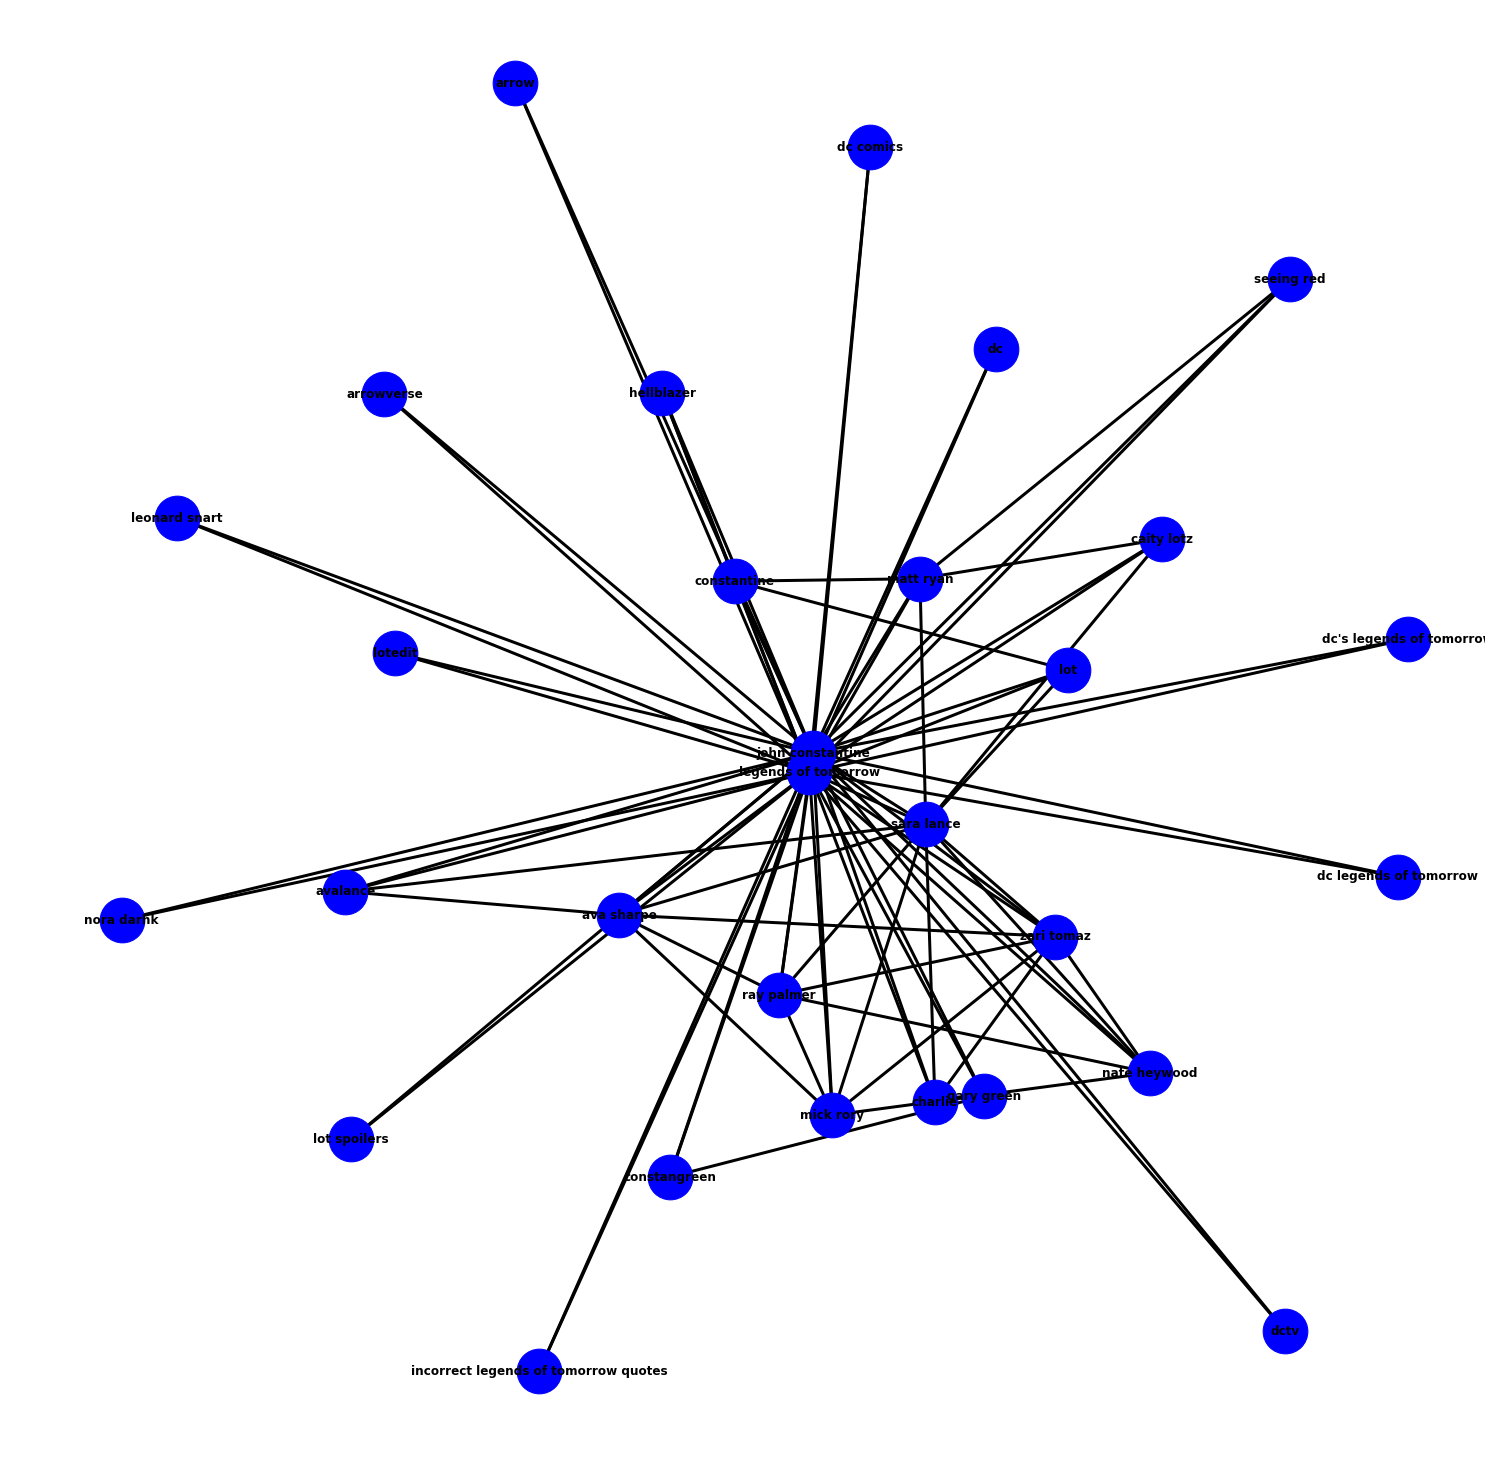

In [82]:
plt.figure(1,figsize=(20,20)) 
networkx.draw(S, 
        with_labels=True, 
        pos=networkx.spring_layout(S), 
        font_weight='bold', 
        node_color="blue", 
        width=3, 
        arrows=True, 
        node_size=2000,
             )